In [1]:
from sklearn import mixture
import pickle
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:

def plot_results(X, Y_, means, covariances, index, title, plot_gmm = True):
    plt.figure(figsize=(15,25))
    splot = plt.subplot(3, 1, 1 + index)
    color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])
    if plot_gmm:
        for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
            v, w = np.linalg.eigh(covar)
            v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
            u = w[0] / np.linalg.norm(w[0])
            # as the DP will not use every component it has access to
            # unless it needs it, we shouldn't plot the redundant
            # components.
#             print(Y_)
            if not np.any(Y_ == i):
                continue
            plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

            # Plot an ellipse to show the Gaussian component
            angle = np.arctan(u[1] / u[0])
            angle = 180.0 * angle / np.pi  # convert to degrees
            ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
            ell.set_clip_box(splot.bbox)
            ell.set_alpha(0.5)
            splot.add_artist(ell)
    else:
        plt.scatter(X[:, 0], X[:, 1], 0.8, color="c")
        

#     plt.xlim(-9.0, 5.0)
#     plt.ylim(-3.0, 6.0)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.show()

### Comparing GMM vs Dirichlet Process on cluster of data

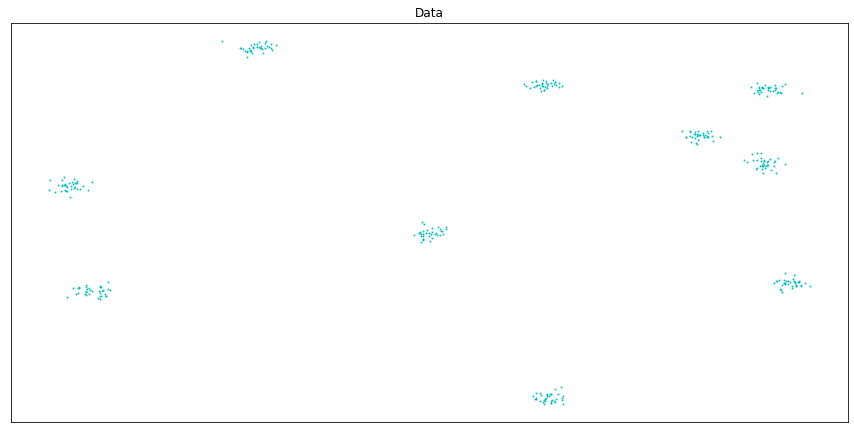

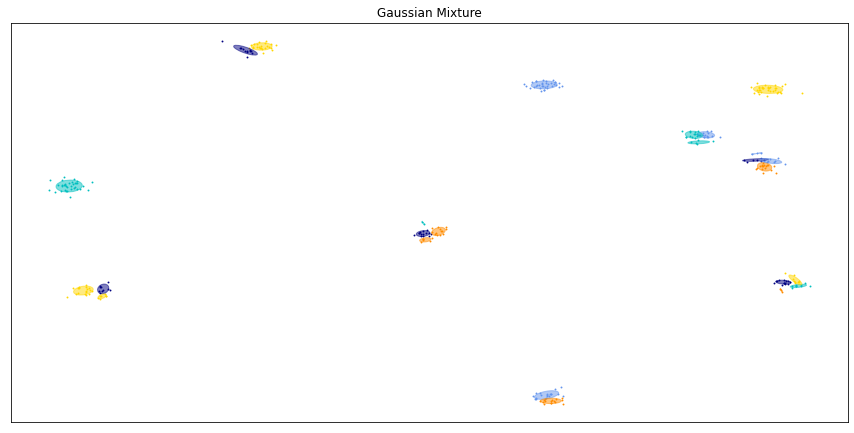

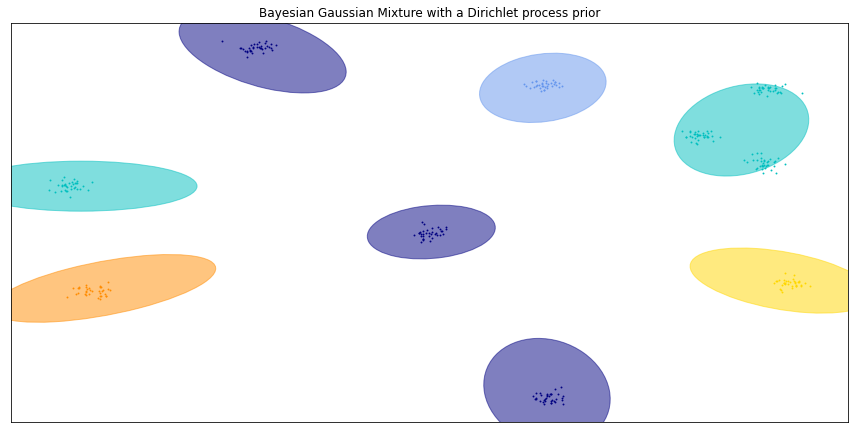

In [3]:
from sklearn.datasets import make_blobs

X_temp, y_temp = make_blobs(n_samples=350, centers=10, cluster_std=0.15)

plot_results(
    X_temp,
    None,
    None,
    None,
    1,
    "Data",
    False
)

# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=25, covariance_type="full", n_init = 5, verbose = 0).fit(X_temp)
plot_results(X_temp, gmm.predict(X_temp), gmm.means_, gmm.covariances_, 0, "Gaussian Mixture")
# plt.show()
# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=25, covariance_type="full", n_init = 5, verbose = 0).fit(X_temp)
plot_results(
    X_temp,
    dpgmm.predict(X_temp),
    dpgmm.means_,
    dpgmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)
# plt.show()
# plt.scatter(X[:, 0], X[:, 1])
plt.show()

## Comparing GMM vs Dirichlet Process for random Data

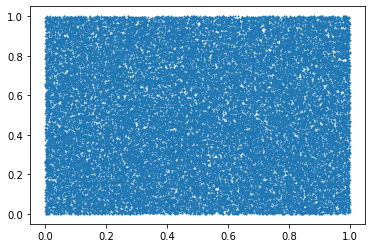

In [4]:
X_tmp = np.random.rand(50000, 2)
plt.scatter(X_tmp[:, 0], X_tmp[:, 1], 0.8, cmap='viridis')
# print(X_tmp.shape, y_tmp.shape)

##### Comment the following if you want to run on uniform data. Comment the top cell if you want to run on normal data

In [ ]:
X_tmp = np.random.normal(size = (50000, 2))
plt.scatter(X_tmp[:, 0], X_tmp[:, 1], 0.8, cmap='viridis')
plt.show()

In [ ]:
bay_gmm = mixture.BayesianGaussianMixture(n_components=100, n_init=5, verbose = 2, random_state = 1)
bay_gmm.fit(X_tmp)

In [ ]:
plt.plot(bay_gmm.weights_)

In [ ]:
tmp_gmm = mixture.GaussianMixture(n_components=100, random_state=1, verbose = 2, n_init = 5).fit(X_tmp)
plt.plot(tmp_gmm.weights_)

In [ ]:
plot_results(X_tmp, tmp_gmm.predict(X_tmp), tmp_gmm.means_, tmp_gmm.covariances_, 0, "Gaussian Mixture")
plot_results(
    X_tmp,
    bay_gmm.predict(X_tmp),
    bay_gmm.means_,
    bay_gmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)
# plt.show()
# plt.scatter(X[:, 0], X[:, 1])
plot_results(
    X_tmp,
    None,
    None,
    None,
    2,
    "Data",
    False
)
plt.show()

In [ ]:
plot_results(X_tmp, tmp_gmm.predict(X_tmp), tmp_gmm.means_, tmp_gmm.covariances_, 0, "Gaussian Mixture")
plot_results(
    X_tmp,
    bay_gmm.predict(X_tmp),
    bay_gmm.means_,
    bay_gmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)
# plt.show()
# plt.scatter(X[:, 0], X[:, 1])
plot_results(
    X_tmp,
    None,
    None,
    None,
    2,
    "Data",
    False
)
plt.show()

## GMM on Generated Data

In [5]:
X = np.zeros((0, 7))
filenames = []

num_components = 0
paths = []
foldername = "/root/catkin_ws/src/jiaming_manipulation/task_planner/empty_world_trajectory_data/env_000000/"
filenames = sorted(glob.glob("%s/*.p"%foldername))
# filenames

In [6]:
# Create paths from trajectory data
for idx, filename in enumerate(filenames[::2]):
    if idx > 0 and idx%500 == 0:
        print(idx)
    with open(filename, "rb") as f:
        path = pickle.load(f, encoding="latin1")['path']
#         path = pickle.load(f)['path']
        paths.append(path)
        path_len = path.shape[0]
        if path_len > num_components:
            num_components = path_len
        X = np.append(X, path, axis=0)

print("Going to fit GMM with %d components : "%(num_components * 2))

500
1000
1500
2000
2500
3000
3500
4000
4500
Going to fit GMM with 262 components : 


### GMM on dataset

In [8]:
gmm = mixture.GaussianMixture(n_components=num_components, random_state=0, n_init = 5, verbose = 2).fit(X)

Initialization 0
  Iteration 10	 time lapse 66.87345s	 ll change 0.00569
  Iteration 20	 time lapse 31.86335s	 ll change 0.00284
  Iteration 30	 time lapse 32.57641s	 ll change 0.00203
  Iteration 40	 time lapse 31.47120s	 ll change 0.00143
  Iteration 50	 time lapse 29.91751s	 ll change 0.00146
Initialization converged: True	 time lapse 216.30634s	 ll -10.86740
Initialization 1
  Iteration 10	 time lapse 61.72774s	 ll change 0.00506
  Iteration 20	 time lapse 31.50765s	 ll change 0.00332
  Iteration 30	 time lapse 31.38190s	 ll change 0.00210
  Iteration 40	 time lapse 30.40634s	 ll change 0.00140
  Iteration 50	 time lapse 32.75681s	 ll change 0.00105
Initialization converged: True	 time lapse 199.67418s	 ll -10.87242
Initialization 2
  Iteration 10	 time lapse 64.89672s	 ll change 0.00527
  Iteration 20	 time lapse 30.69171s	 ll change 0.00311
  Iteration 30	 time lapse 29.44125s	 ll change 0.00248
  Iteration 40	 time lapse 29.37197s	 ll change 0.00159
  Iteration 50	 time lapse 30

In [12]:
edges = []
for idx, path in enumerate(paths):
    if idx % 500 == 0:
        print(idx)
    predicted_distributions = gmm.predict(path)
    if idx%100 == 0:
        print(predicted_distributions)
    path_len = len(path)
    for idx1, idx2 in zip(range(path_len), range(1, path_len)):
        dist1, dist2 = predicted_distributions[idx1], predicted_distributions[idx2]
        if dist1!=dist2:
            edges.append([dist1, dist2])


0
[1151 1151 1151 1151 1151 1151 1151 1151 1151 1151 1151 1151 1151 1151
 1151 1151 1151 1151 1151 1151 1151 1151 1151 1151 1151 1151 1151 1151
 1151 1151 1151 1151 1151 1151 1151 1151 1151 1151 1151 1151 1151 1151
 1151 1151 1151 1151 1151 1151 1151 1151 1151 1151 1151 1151 1151 1151
 1151 1151 1151 1151 1151 1151 1151 1151 1151 1151]
[31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31]
[40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40
 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40
 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40
 40 40 40]
[190 190 190 190 190 190 190 190 190 190 190 190 190 190 190 190 190 190
 190 190 190 190 190 190 190 190 190 190 190 190 190 190 190 190 190 190
 190 190 190 190 190 190 190 190 190 190 190 190 190 190 190 190 190 190
 190 190 190 190 190 190 190 190 190]
[349 349 349 349 349 349 349 349 349 349 349 349 349 349 349 349 349 349
 349 349 349 349 3

3500
[789 789 789 789 789 789 789 789 789 789 789 789 789 789 789 789 789 789
 789 789 789 789 789 789 789 789 789 789 789 789 789 789 789 789 789 789
 789 789 789 789 789 789 789 789 789 789 789 789 789 789 789 789 789 789
 789 789 789 789 789 789 789 789 789 789 789 789 789 789 789 789 789 789
 789 789 789 789 789 789]
[332 332 332 332 332 332 332 332 332 332 332 332 332 332 332 332 332 332
 332 332 332 332 332 488 488 488 488 488 488 488 488 488 488 488 488 488
 488 488 488 488 488 488 488 488 488 488 488 488 488 488 488 488 488 488
 488 488]
[618 618 618 618 618 618 618 618 618 618 618 618 618 252 252 252 252 252
 252 252 252 252 252 252 252 252 252 252 252 736 736 736 736 736 736 736
 736 736 736 736 555 555 555 555 555 555 555 555 555 555 555 555 555 555
 555 555 555 555 555 555 555 555 555 555]
[101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101
 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101
 101 101 101 101 101 101 101 101 101 101 

In [16]:
gmm_name = '../computed_gmms_dir/gmm/'

import os
if not os.path.exists(gmm_name):
    os.makedirs(gmm_name)

np.save(gmm_name + 'weights', gmm.weights_, allow_pickle=False)
np.save(gmm_name + 'means', gmm.means_, allow_pickle=False)
np.save(gmm_name + 'covariances', gmm.covariances_, allow_pickle=False)



In [17]:
edges = np.array(edges)
unique, counts = np.unique(edges, return_counts=True, axis = 0)
probabilities = counts / np.sum(counts) # the probability of the edge e_i occuring amongst all edges

np.save(gmm_name + "edges.npy", unique)
np.save(gmm_name + "edge_probabilities.npy", probabilities)

### Dirichlet Process on data

In [9]:
dpgmm = mixture.BayesianGaussianMixture(n_components=num_components * 2, random_state=1, verbose=2, n_init = 5).fit(X)

Initialization 0
  Iteration 10	 time lapse 115.35560s	 ll change 2578.14581
  Iteration 20	 time lapse 62.03464s	 ll change 1361.38526
  Iteration 30	 time lapse 61.66352s	 ll change 762.23224
  Iteration 40	 time lapse 62.43294s	 ll change 578.05647
  Iteration 50	 time lapse 61.82083s	 ll change 375.98157
  Iteration 60	 time lapse 62.49271s	 ll change 228.55029
  Iteration 70	 time lapse 63.42158s	 ll change 230.78045
  Iteration 80	 time lapse 62.84231s	 ll change 209.60302
  Iteration 90	 time lapse 62.40412s	 ll change 171.54040
  Iteration 100	 time lapse 62.45737s	 ll change 155.99375
Initialization converged: False	 time lapse 676.92568s	 ll -1246213.20674
Initialization 1
  Iteration 10	 time lapse 107.48413s	 ll change 2702.64070
  Iteration 20	 time lapse 62.28707s	 ll change 1219.94339
  Iteration 30	 time lapse 62.63427s	 ll change 871.74592
  Iteration 40	 time lapse 61.98577s	 ll change 559.27901
  Iteration 50	 time lapse 62.56608s	 ll change 331.01736
  Iteration 60	

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [10]:
dpgmm_name = '../computed_gmms_dir/dpgmm/'

import os
if not os.path.exists(dpgmm_name):
    os.makedirs(dpgmm_name)

np.save(dpgmm_name + 'weights', dpgmm.weights_, allow_pickle=False)
np.save(dpgmm_name + 'means', dpgmm.means_, allow_pickle=False)
np.save(dpgmm_name + 'covariances', dpgmm.covariances_, allow_pickle=False)

(293409, 2)


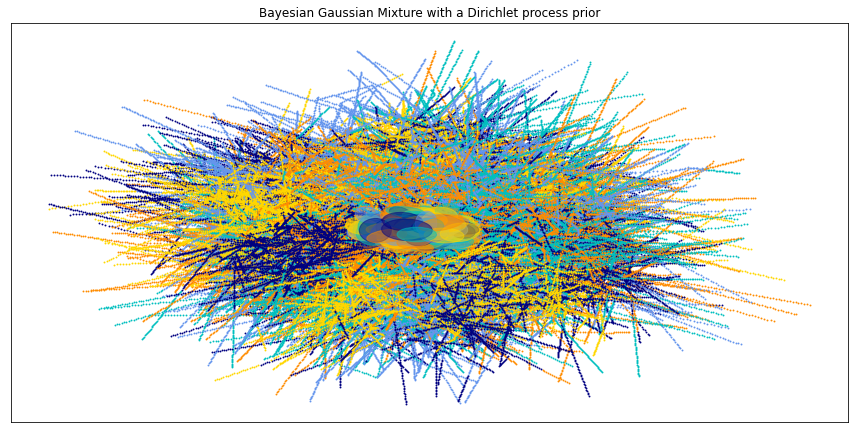

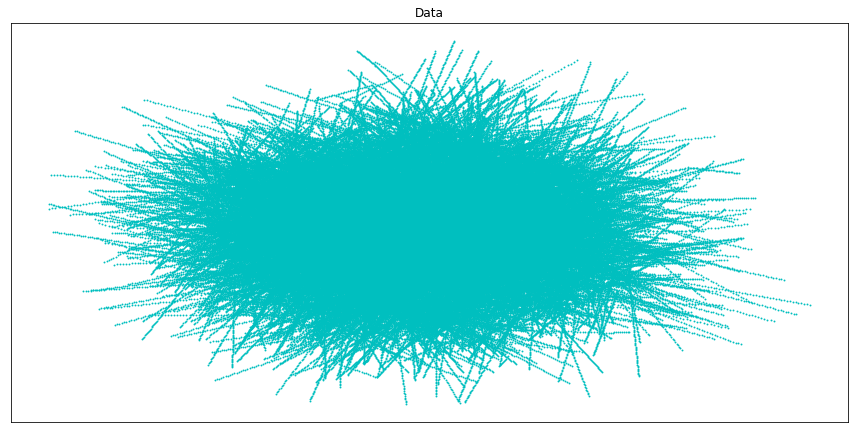

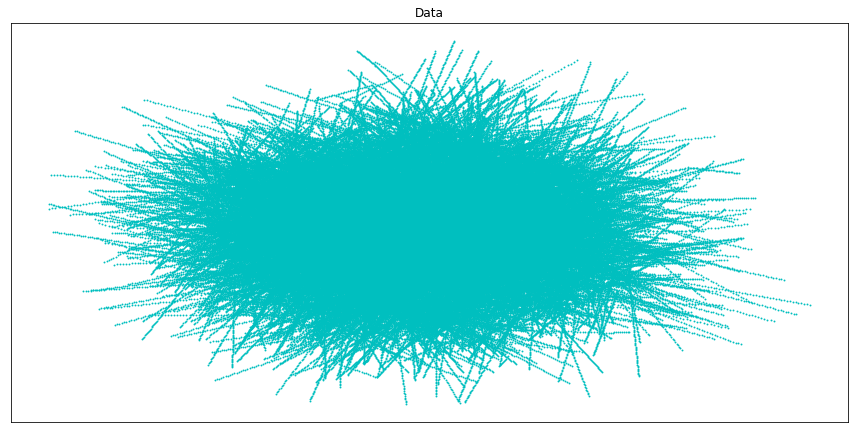

In [13]:
X_pca = PCA(n_components=2).fit_transform(X)
# gmm_predicted = gmm.predict(X)
print(X_pca.shape)
# plot_results(X_pca[::2], gmm_predicted[::2], PCA(n_components=2).fit_transform(X) , gmm.covariances_, 0, "Gaussian Mixture")
# # plt.show()
# # Fit a Dirichlet process Gaussian mixture using five components
# plot_results(
#     X_pca,
#     gmm.predict(X),
#     dpgmm.means_,
#     dpgmm.covariances_,
#     1,
#     "Bayesian Gaussian Mixture with a Dirichlet process prior",
# )
# # plt.show()
# # plt.scatter(X[:, 0], X[:, 1])
plot_results(
    X_pca,
    dpgmm.predict(X),
    dpgmm.means_,
    dpgmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)
plot_results(
    X_pca,
    dpgmm.predict(X),
    dpgmm.means_,
    dpgmm.covariances_,
    2,
    "Data",
    False
)
plot_results(
    X_pca,
    dpgmm.predict(X),
    dpgmm.means_,
    dpgmm.covariances_,
    2,
    "Data",
    False
)


plt.show()

## Code to create graph from GMM

In [12]:
# replace dpgmm with gmm if using GMM
edges = []
for idx, path in enumerate(paths):
    if idx % 500 == 0:
        print(idx)
    predicted_distributions = dpgmm.predict(path)
    path_len = len(path)
    for idx1, idx2 in zip(range(path_len), range(1, path_len)):
        dist1, dist2 = predicted_distributions[idx1], predicted_distributions[idx2]
        if dist1!=dist2:
            edges.append([dist1, dist2])

edges = np.array(edges)
unique, counts = np.unique(edges, return_counts=True, axis = 0)
probabilities = counts / np.sum(counts) # the probability of the edge e_i occuring amongst all edges

np.save(dpgmm_name + "edges.npy", unique)
np.save(dpgmm_name + "edge_probabilities.npy", probabilities)

0
500
1000
1500
2000
2500
3000
3500
4000
4500


In [30]:
dpgmm.means_.shape

(262, 7)

In [ ]:
!pip3 install matplotlib